# Transfer Learning - VGG 16 Model

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input
from tensorflow.keras.models import Model  
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
import sys, os

!wget -nc https://lazyprogrammer.me/course_files/Food-5K.zip

File ‘Food-5K.zip’ already there; not retrieving.



In [2]:
!unzip -qq -o  Food-5K.zip

In [3]:
!ls Food-5K/

evaluation  training  validation


<function matplotlib.pyplot.show>

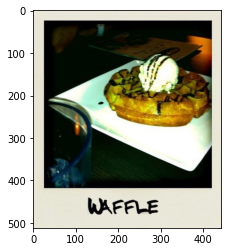

In [4]:
plt.imshow(image.load_img('Food-5K/training/1_22.jpg'))
plt.show

In [5]:
!mkdir data
!mkdir data/train
!mkdir data/validation
!mkdir data/test
!mkdir data/train/nonfood
!mkdir data/train/food
!mkdir data/validation/nonfood
!mkdir data/validation/food
!mkdir data/test/nonfood 
!mkdir data/test/food

!mv Food-5K/training/0*.jpg  data/train/nonfood
!mv Food-5K/training/1*.jpg  data/train/food
!mv Food-5K/validation/0*.jpg  data/validation/nonfood
!mv Food-5K/validation/1*.jpg  data/validation/food
!mv Food-5K/evaluation/0*.jpg  data/test/nonfood
!mv Food-5K/evaluation/1*.jpg  data/test/food

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘data/train’: File exists
mkdir: cannot create directory ‘data/validation’: File exists
mkdir: cannot create directory ‘data/test’: File exists
mkdir: cannot create directory ‘data/train/nonfood’: File exists
mkdir: cannot create directory ‘data/train/food’: File exists
mkdir: cannot create directory ‘data/validation/nonfood’: File exists
mkdir: cannot create directory ‘data/validation/food’: File exists
mkdir: cannot create directory ‘data/test/nonfood’: File exists
mkdir: cannot create directory ‘data/test/food’: File exists


In [6]:
train_path = 'data/train'
validation_path = 'data/validation'
test_path = 'data/test'

In [7]:
Image_size =[200,200]
train_image_files = glob(train_path + '/*/*.jpg')
validation_image_files = glob(validation_path + '/*/*.jpg')
test_image_files = glob(test_path + '/*/*.jpg')

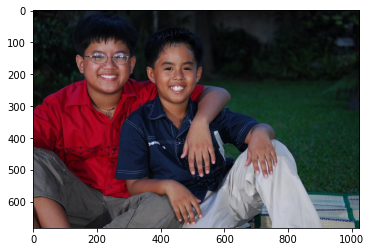

In [8]:
plt.imshow(image.load_img(np.random.choice(train_image_files)))
plt.show()

In [9]:
ptm = PretrainedModel(
      input_shape = Image_size + [3],
      weights ='imagenet',
      include_top = False 
)
ptm.trainable = False

In [10]:
ptm.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [11]:
#map the data into feature vectors
#Keras image data generator returns clases one-hot encoded
K = 2
x = Flatten()(ptm.output)
x = Dense(K, activation = 'softmax')(x)
model = Model(inputs=ptm.input, outputs = x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [14]:
gen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    preprocessing_function=preprocess_input
)
batch_size = 128
#Create Generators 
train_genertor = gen.flow_from_directory(
    train_path,
    shuffle = True, 
    target_size = Image_size,
    batch_size = batch_size,
)
valid_generator = gen.flow_from_directory(
    validation_path,
    target_size = Image_size,
    batch_size = batch_size,
)
test_generator = gen.flow_from_directory(
    test_path,
    target_size = Image_size,
    batch_size = batch_size
)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer ='adam',
    metrics =['accuracy']
)
r = model.fit_generator(
    train_genertor,
    validation_data=valid_generator,
    epochs = 10,
    steps_per_epoch = int(np.ceil(len(train_image_files)/batch_size)),
    validation_steps = int(np.ceil(len(validation_image_files)/batch_size)),
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
24/24 [==============================] - 75s 3s/step - loss: 1.7981 - accuracy: 0.9150 - val_loss: 0.6176 - val_accuracy: 0.9700
Epoch 2/10
24/24 [==============================] - 67s 3s/step - loss: 0.4547 - accuracy: 0.9773 - val_loss: 0.7573 - val_accuracy: 0.9660
Epoch 3/10
24/24 [==============================] - 66s 3s/step - loss: 0.3066 - accuracy: 0.9823 - val_loss: 0.8448 - val_accuracy: 0.9630
Epoch 4/10
24/24 [==============================] - 66s 3s/step - loss: 0.3414 - accuracy: 0.9827 - val_loss: 0.9189 - val_accuracy: 0.9680
Epoch 5/10
24/24 [==============================] - 66s 3s/step - loss: 0.2175 - accuracy: 0.9890 - val_loss: 1.1778 - val_accuracy: 0.9650
Epoch 6/10
24/24 [==============================] - 66s 3s/step - loss: 0.2100 - accuracy: 0.9853 - val_loss: 1.0793 - val_accuracy: 0.9600
Epoch 7/10
24/24 [==============================] - 66s 3s/step - loss: 0.1422 - acc

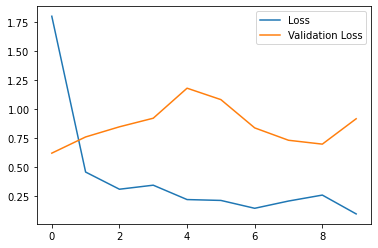

In [16]:
plt.plot(r.history['loss'], label ='Loss')
plt.plot(r.history['val_loss'], label ='Validation Loss')
plt.legend()

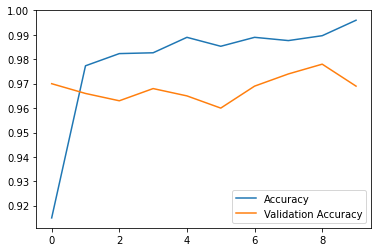

In [17]:
plt.plot(r.history['accuracy'], label ='Accuracy')
plt.plot(r.history['val_accuracy'], label ='Validation Accuracy')
plt.legend()